In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../")

In [53]:
import pickle
from itertools import chain
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from CwnGraph import CwnBase

In [3]:
from MWE2019.cwn_vectors import CwnVectors
from MWE2019.cwn_morph_graph import CwnMorphGraph

In [4]:
cwn = CwnBase()

In [5]:
cwn_vec = CwnVectors()

load from cache:  E:\LangOn\MWE2019\data\cache_cwn_vectors\cwn_vectors.pkl


# Build CwnMorphGraph

In [6]:
cwn_mg = CwnMorphGraph()

In [7]:
G = cwn_mg.G

In [112]:
print("Morphology Graph: ")
print("|V|: ", G.number_of_nodes())
print("|E|: ", G.number_of_edges())

Morphology Graph: 
|V|:  18251
|E|:  27932


In [8]:
from collections import Counter
reltype_counts = Counter(edata["reltype"] for _, edata in G.edges.items())

In [9]:
reltype_counts

Counter({'synonym': 8715,
         'varword': 639,
         'antonym': 1333,
         'nearsynonym': 1348,
         'hyponym': 1263,
         'hypernym': 962,
         'morph': 13480,
         'meronym': 115,
         'holonym': 73,
         'variant': 4})

# Layout with sfdp

In [38]:
pos = nx.nx_pydot.pydot_layout(G, 'sfdp')

In [42]:
with open("../data/cache_cwn_morph_graph/sfdp_layout.pkl", "wb") as fin:
    pickle.dump(pos, fin)

In [68]:
xmin = min([x for x, y in pos.values()])
xmax = max([x for x, y in pos.values()])
ymin = min([y for x, y in pos.values()])
ymax = max([y for x, y in pos.values()])
xavg = np.mean([x[0] for x in pos.values()])
yavg = np.mean([x[1] for x in pos.values()])

In [69]:
xmin, xmax, ymin, ymax, xavg, yavg

(27.0, 5832.0, 18.0, 5838.0, 2921.349349295929, 2852.2672768615416)

In [90]:
binx, freq = np.unique([x for n, x in G.degree], return_counts=True)
binx, freq

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  68,
         70,  74,  75,  77,  78,  80,  81,  82,  84,  85,  86,  87,  89,
        103, 112, 113, 116, 132]),
 array([ 1723, 11342,  1232,   753,   501,   333,   307,   244,   202,
          180,   169,   142,   122,    94,    88,    87,    71,    54,
           59,    43,    36,    35,    48,    22,    24,    21,    21,
           30,    15,    10,    21,    15,    22,    11,    11,     7,
           11,    11,    14,    12,     6,     7,     7,     1,     5,
            5,     3,     6,     7,     3,     3,     3,     4,     3,
            2,     4,     1,     3,     4,     3,     2,     2,     1,
            1,     2,     1,  

In [103]:
sG = G.subgraph([n for n, x in G.degree if x > 10])

In [104]:
def transform_pos(pos):
    x,y = pos
    cx = x - xavg
    cy = y - yavg
    theta = np.arctan2(cy, cx)
    r = np.sqrt(cx**2 + cy**2)
    newr = 1 - np.exp(-r/150)
    newx = newr * np.cos(theta)
    newy = newr * np.sin(theta)
    return newx, newy
new_pos = {k: transform_pos(x) for k, x in pos.items()}

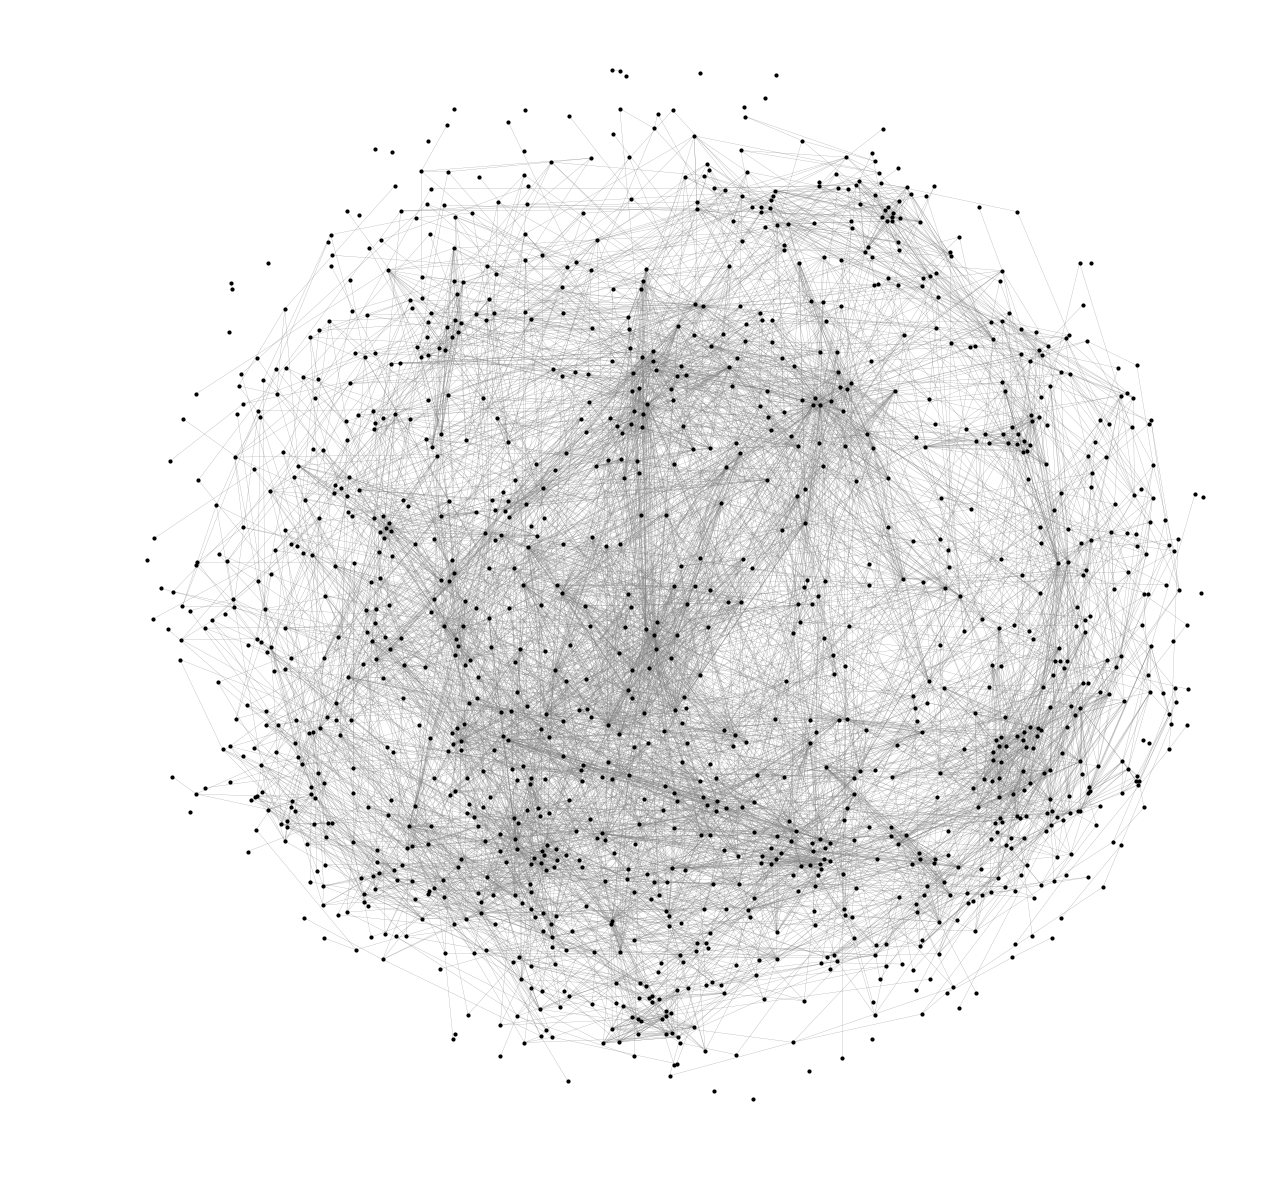

In [109]:
fig = plt.figure(figsize=(10,10), dpi=150)
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('black')
nx.draw(sG, new_pos, node_size=1, node_color='black', edge_color='gray', width=0.1, facecolor='black')

In [110]:
fig.savefig('../data/cwn_morph_graph/cwn_mg_subset.png')

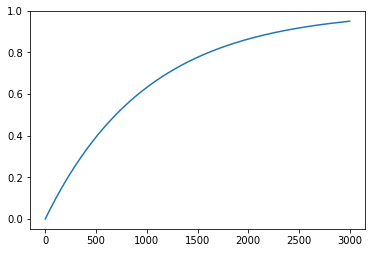

In [62]:
x=np.arange(0,3000)
plt.plot(x, 1-np.exp(-x/1000))